In [2]:
#dependencies
import dash
import dash as dcc
from dash import html
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px


In [3]:
#import cleaned csv file from data folder
large_fires_df = pd.read_csv('data/cleaned_largefires.csv')

In [4]:
large_fires_df.head()

FIRE_NAME  FIRE_YEAR  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE  \
0           FREDS     2004.0     7700.0               G  38.780000   
1    AUSTIN CREEK     2005.0      125.0               D  36.001667   
2  THOMPSON BUTTE     2005.0      119.0               D  43.899167   
3    CHARLES DRAW     2005.0      119.0               D  43.892778   
4           THREE     2005.0    16100.0               G  33.723333   

    LONGITUDE STATE  
0 -120.260000    CA  
1  -81.590000    NC  
2 -102.954722    SD  
3 -102.948056    SD  
4 -111.275000    AZ

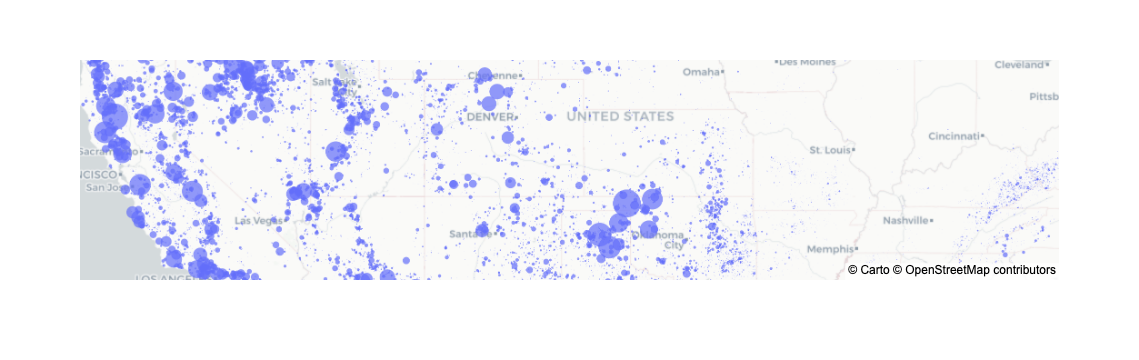

In [6]:
fig = px.scatter_mapbox(large_fires_df, lat = 'LATITUDE', lon = 'LONGITUDE', size = 'FIRE_SIZE',color = 'tot_pop', 
                        color_continuous_scale = 'plasma',
                        zoom = 4, mapbox_style = 'carto-positron')
                        
fig.show()

In [16]:
#create intervals for bubble plot based on NWCG standard
#https://www.nwcg.gov/sites/default/files/data-standards/pdf/values.pdf





stages = ["1000000+", "300001-400000", "200001-300000", "100001-200000", "50001-100000", "10001-50000",
         "1001-10000", "101-1000", "1-100"]

# Create tuples of row indexes for the above ranges
tuple1 = (0, df[df.Active > 400000].index[-1]+1)
tuple2 = (tuple1[1], df[(df.Active > 300000) & (df.Active <=400000)].index[-1]+1)
tuple3 = (tuple2[1], df[(df.Active > 200000) & (df.Active <=300000)].index[-1]+1)
tuple4 = (tuple3[1], df[(df.Active > 100000) & (df.Active <=200000)].index[-1]+1)
tuple5 = (tuple4[1], df[(df.Active > 50000) & (df.Active <=100000)].index[-1]+1)
tuple6 = (tuple5[1], df[(df.Active > 10000) & (df.Active <=50000)].index[-1]+1)
tuple7 = (tuple6[1], df[(df.Active > 1000) & (df.Active <=10000)].index[-1]+1)
tuple8 = (tuple7[1], df[(df.Active > 100) & (df.Active <=1000)].index[-1]+1)
tuple9 = (tuple8[1], df[df.Active <=100].index[-1]+1)

limits = [tuple1, tuple2, tuple3, tuple4, tuple5, tuple6, tuple7, tuple8, tuple9]
limits

In [17]:
fig = go.Figure()